In [1]:
import numpy as np
from training_data import generate_stationary_agent_choices
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from training_data import sigmoid

In [2]:
from load_data import load_common_metadata
from outguesser import linear_choice_history_dependent_model

In [3]:
from outguesser import separate_choices_sequences_into_history_and_choice
from outguesser import momentum_gradient_descent, maximum_a_posteriori

In [4]:
data_dir = '../experiments/'
metadata = load_common_metadata(data_dir)

In [5]:
metadata;

In [6]:
def get_model_params(expdataframe, weight_prior, optimizer):
    choices = pd.DataFrame.from_csv(data_dir + expdataframe['ChoicesFile']).values
    weights = optimizer(weight_prior, choices)
    return weights

In [7]:
no_feedback_data = metadata[metadata['ConfigFile']=='config/experiment2.json']
len(no_feedback_data)

17

In [8]:
exp_choices_history = metadata[metadata['ConfigFile']=='config/experiment4.json']
len(exp_choices_history)

17

In [9]:
exp_reward_history = metadata[metadata['ConfigFile']=='config/experiment3.json']
len(exp_reward_history)

18

### Classification error

In [10]:
from outguesser import momentum_gradient_descent
def get_classification_error(experiment, history_length):
    choices = pd.DataFrame.from_csv(data_dir + experiment['ChoicesFile']).values
    x, y = separate_choices_sequences_into_history_and_choice(choices[:,0], history_length)
    
    ones_row = np.ones((1, x.shape[1]))
    x = np.concatenate((ones_row, x), axis=0)

    number_of_data_points = x.shape[1]
    validation_chunk_size = int(validation_ratio*number_of_data_points)
    all_indxs = np.arange(0, number_of_data_points)
    weight_prior = np.zeros((history_length+1,))

    classification_error=[]
    for i in np.arange(0, int(number_of_data_points/validation_chunk_size)):
        test_idxs = np.arange(i*validation_chunk_size, (i+1)*validation_chunk_size)
        training_idxs = np.array(list(set(all_indxs)-set(test_idxs)))
        model_params = momentum_gradient_descent(weight_prior, x[:,training_idxs], y[training_idxs])
        predictions = [maximum_a_posteriori(model_params,x_i) for x_i in np.transpose(x[:, test_idxs])]
        classification_error.append(np.sum(predictions!=y[test_idxs])/validation_chunk_size)
    return classification_error
    

Cross validation: experiment no feedback

In [11]:
validation_ratio = 0.2
history_length = 5
weight_prior = np.zeros((history_length+1))
classification_errors_no_feed=[]
for i in range(len(no_feedback_data)):
    classification_errors_no_feed.append(get_classification_error(no_feedback_data.iloc[i], history_length))
mean_class_errors_no_feed = np.mean(np.array(classification_errors_no_feed), axis=1)
np.mean(mean_class_errors_no_feed)

/home/amadeus/miniconda3/envs/unbias/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


0.43625450180072034

/home/amadeus/miniconda3/envs/unbias/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


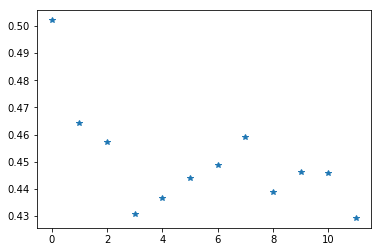

In [12]:
mean_error_no_feed = np.zeros((12,))
for history_length in range(0,12):
    classification_errors_no_feed=[]
    for i in range(len(no_feedback_data)):
        classification_errors_no_feed.append(get_classification_error(no_feedback_data.iloc[i], history_length))
    mean_class_errors_no_feed = np.mean(np.array(classification_errors_no_feed), axis=1)
    mean_error_no_feed[history_length] = np.mean(mean_class_errors_no_feed)
plt.plot(mean_error_no_feed,'*')
plt.show()

In [13]:
results_no_feed = list(zip(no_feedback_data['AgentName'].values, mean_class_errors_no_feed))
results_no_feed.sort(key=lambda x: x[1])
results_no_feed

[('poornima', 0.3489361702127659),
 ('poornima', 0.3702127659574468),
 ('laura', 0.37872340425531914),
 ('alex', 0.38297872340425526),
 ('vassilis', 0.39574468085106385),
 ('monzilur', 0.4085106382978723),
 ('brianlau', 0.4127659574468085),
 ('paulpfeiffer', 0.4170212765957446),
 ('chen', 0.4382978723404255),
 ('ninjaturtle', 0.4382978723404255),
 ('sr', 0.4382978723404255),
 ('sara', 0.4468085106382979),
 ('ninjaturtle', 0.4553191489361702),
 ('nikita', 0.47234042553191485),
 ('andre', 0.47659574468085103),
 ('samuel', 0.49361702127659574),
 ('lr', 0.5234042553191489)]

In [14]:
import seaborn as sns

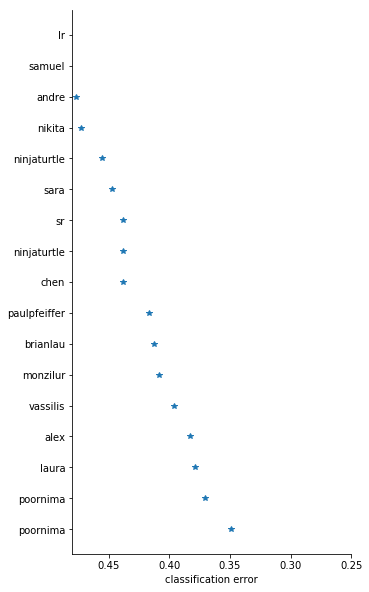

In [15]:
y = np.arange(0,len(no_feedback_data))
x_no_feed = np.zeros((len(no_feedback_data),))
my_yticks = []
for i in range(len(no_feedback_data)):
    x_no_feed[i] = results_no_feed[i][1]
    my_yticks.append(results_no_feed[i][0])
    
    
plt.figure(figsize=(5,10))

plt.yticks(y, my_yticks)
plt.plot(x_no_feed, y,'*')
plt.xlabel('classification error')
plt.xlim(0.48,0.25)
sns.despine()
plt.savefig('../unbias/unbias',dpi=150,bbox_inches='tight')
plt.show()

#### Cross validation: experiment 3

In [16]:
validation_ratio = 0.2
history_length = 5
weight_prior = np.zeros((history_length+1))

In [17]:
classification_errors_exp3=[]
for i in range(len(exp_reward_history)):
    classification_errors_exp3.append(get_classification_error(exp_reward_history.iloc[i], history_length))

/home/amadeus/miniconda3/envs/unbias/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
mean_class_errors_exp3 = np.mean(np.array(classification_errors_exp3), axis=1)

In [19]:
np.mean(mean_class_errors_exp3)

0.4863945578231293

/home/amadeus/miniconda3/envs/unbias/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


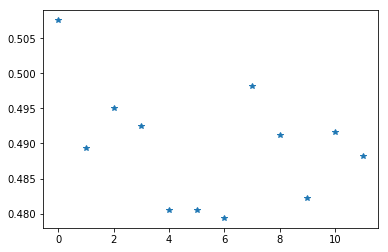

In [20]:
mean_error_exp3 = np.zeros((12,))
for history_length in range(0,12):
    classification_errors_exp3=[]
    for i in range(len(exp_reward_history)):
        classification_errors_exp3.append(get_classification_error(exp_reward_history.iloc[i], history_length))
    mean_class_errors_exp3 = np.mean(np.array(classification_errors_exp3), axis=1)
    mean_error_exp3[history_length] = np.mean(mean_class_errors_exp3)
plt.plot(mean_error_exp3,'*')
plt.show()

#### Ranking

In [21]:
results_exp3 = list(zip(exp_reward_history['AgentName'].values, mean_class_errors_exp3))
results_exp3.sort(key=lambda x: x[1])
results_exp3

[('amadeus', 0.4042553191489361),
 ('beckie', 0.425531914893617),
 ('paulpfeiffer', 0.4340425531914893),
 ('lr', 0.44680851063829785),
 ('vincent', 0.451063829787234),
 ('chris', 0.47659574468085103),
 ('andre', 0.48085106382978726),
 ('ninjaturtle', 0.48510638297872344),
 ('christian', 0.48510638297872344),
 ('auriane', 0.49361702127659574),
 ('poornima', 0.502127659574468),
 ('samuel', 0.5063829787234042),
 ('amadeus', 0.5191489361702127),
 ('nikita', 0.5191489361702127),
 ('alex', 0.5234042553191489),
 ('bhanu', 0.5404255319148936),
 ('adrien', 0.5446808510638299),
 ('spiros', 0.548936170212766)]

In [22]:
import seaborn as sns

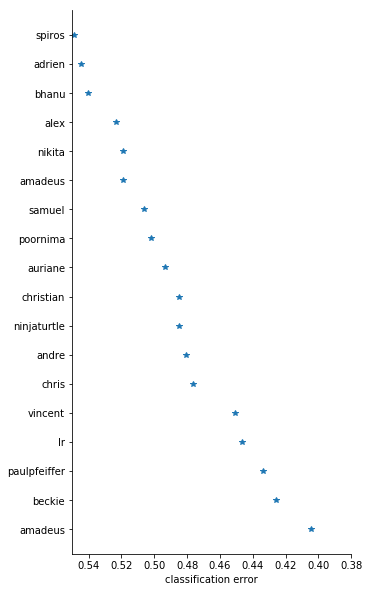

In [23]:
y = np.arange(0,len(exp_reward_history))
x_exp3 = np.zeros((len(exp_reward_history),))
my_yticks = []
for i in range(len(exp_reward_history)):
    x_exp3[i] = results_exp3[i][1]
    my_yticks.append(results_exp3[i][0])
    
    
plt.figure(figsize=(5,10))

plt.yticks(y, my_yticks)
plt.plot(x_exp3, y,'*')
plt.xlabel('classification error')
plt.xlim(0.55,0.38)
sns.despine()
plt.savefig('../unbias/unbias',dpi=150,bbox_inches='tight')
plt.show()

Cross validation: experiment 4

In [24]:
classification_errors_exp4=[]
for i in range(len(exp_choices_history)):
    classification_errors_exp4.append(get_classification_error(exp_choices_history.iloc[i], history_length))
mean_class_errors_exp4 = np.mean(np.array(classification_errors_exp4), axis=1)
np.mean(mean_class_errors_exp4)

/home/amadeus/miniconda3/envs/unbias/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


0.48485607008760945

/home/amadeus/miniconda3/envs/unbias/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


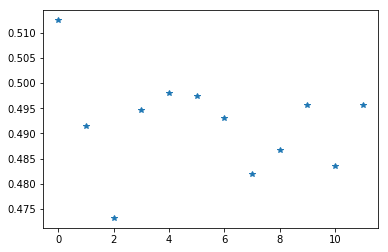

In [25]:
mean_error_exp4 = np.zeros((12,))
for history_length in range(0,12):
    classification_errors_exp4=[]
    for i in range(len(exp_choices_history)):
        classification_errors_exp4.append(get_classification_error(exp_choices_history.iloc[i], history_length))
    mean_class_errors_exp4 = np.mean(np.array(classification_errors_exp4), axis=1)
    mean_error_exp4[history_length] = np.mean(mean_class_errors_exp4)
plt.plot(mean_error_exp4,'*')
plt.show()

In [26]:
results_exp4 = list(zip(exp_choices_history['AgentName'].values, mean_class_errors_exp4))
results_exp4.sort(key=lambda x: x[1])
results_exp4

[('adrien', 0.425531914893617),
 ('andre', 0.44255319148936173),
 ('poornima', 0.44680851063829785),
 ('adriencoin', 0.45531914893617015),
 ('bhanu_prob', 0.4723404255319149),
 ('pia', 0.47659574468085103),
 ('paulpfeiffer', 0.4851063829787233),
 ('teresa', 0.48510638297872344),
 ('alessandro', 0.48936170212765956),
 ('samuel', 0.49361702127659574),
 ('auriane', 0.5063829787234042),
 ('bhanu', 0.5063829787234043),
 ('amadeus', 0.5276595744680851),
 ('joe', 0.5276595744680852),
 ('beckie', 0.553191489361702),
 ('tad', 0.5617021276595745),
 ('paulpfeiffer', 0.5702127659574467)]

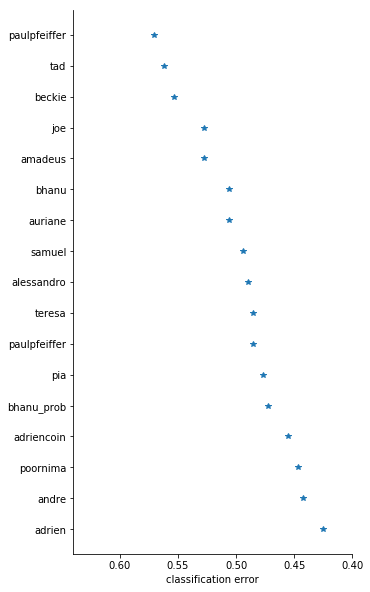

In [27]:
y = np.arange(0,len(exp_choices_history))
x_exp4 = np.zeros((len(exp_choices_history),))
my_yticks = []
for i in range(len(exp_choices_history)):
    x_exp4[i] = results_exp4[i][1]
    my_yticks.append(results_exp4[i][0])
    
    
plt.figure(figsize=(5,10))

plt.yticks(y, my_yticks)
plt.plot(x_exp4, y,'*')
plt.xlabel('classification error')
plt.xlim(0.64,0.40)
sns.despine()
plt.savefig('../unbias/unbias',dpi=150,bbox_inches='tight')
plt.show()

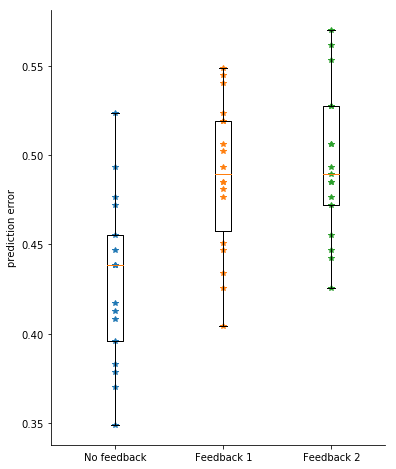

In [28]:
plt.figure(figsize=(6,8))
plt.plot(np.ones(len(x_no_feed),),x_no_feed,'*')
plt.boxplot(x_no_feed,positions=[1])
plt.plot(2*np.ones(len(x_exp3),),x_exp3,'*')
plt.boxplot(x_exp3,positions=[2])
plt.plot(3*np.ones(len(x_exp4),),x_exp4,'*')
plt.boxplot(x_exp4,positions=[3])
plt.xticks(np.arange(1,4),['No feedback', 'Feedback 1', 'Feedback 2'])
plt.xlim(0.4,3.5)
plt.ylabel('prediction error')
sns.despine()
